In [255]:
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

In [256]:
audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav',
    'archivo_wav4': 'sound4.wav',
    'archivo_wav5': 'sound5.wav'
}

### Reproducimos el audio 

In [257]:
#Load a wave file and play it
wave_obj = sa.WaveObject.from_wave_file(audios['archivo_wav1'])
play_obj = wave_obj.play()
play_obj.wait_done()

### Representamos el wave file en tiempo continuo y discreto

plot the wave sound1.wav


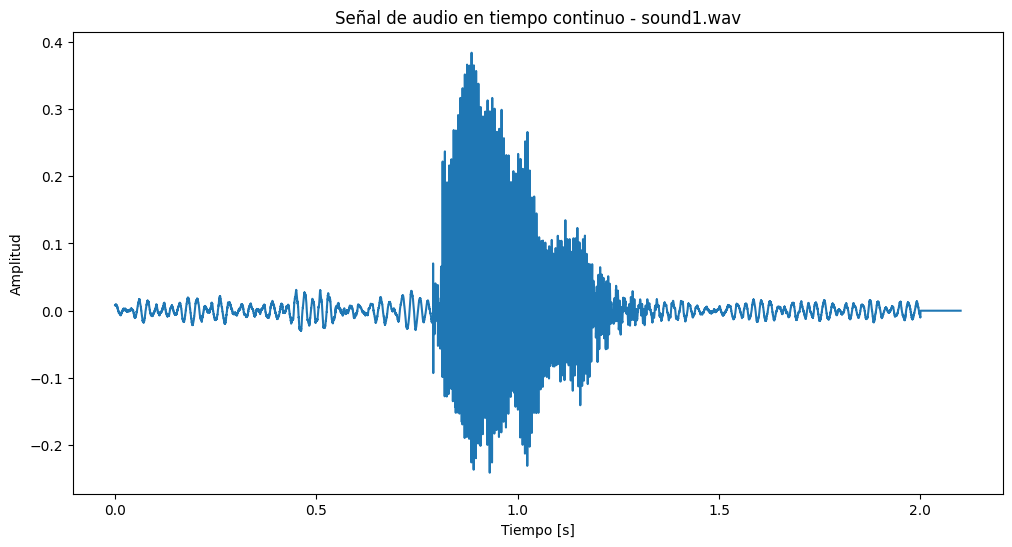

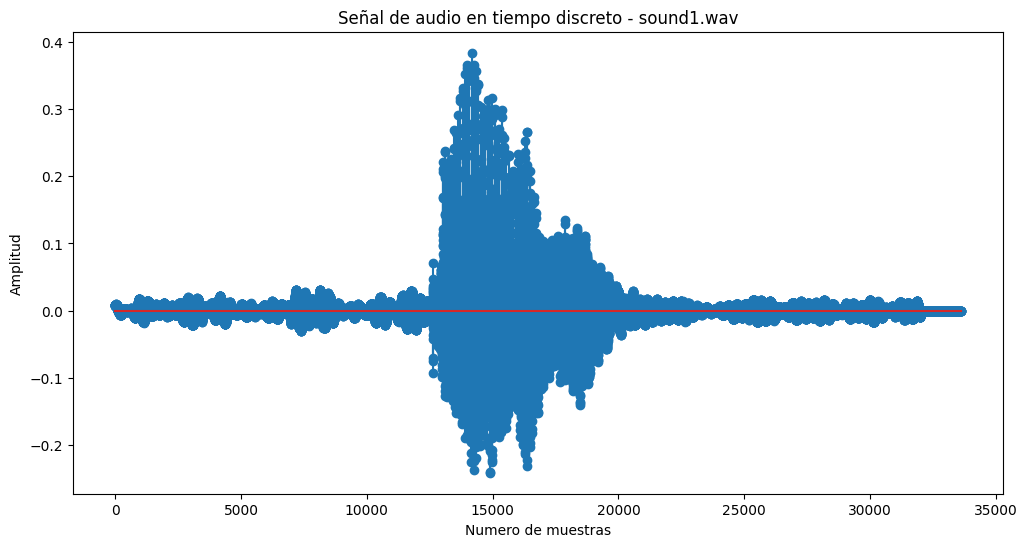

--------------------------------------------------------------------
plot the wave sound2.wav


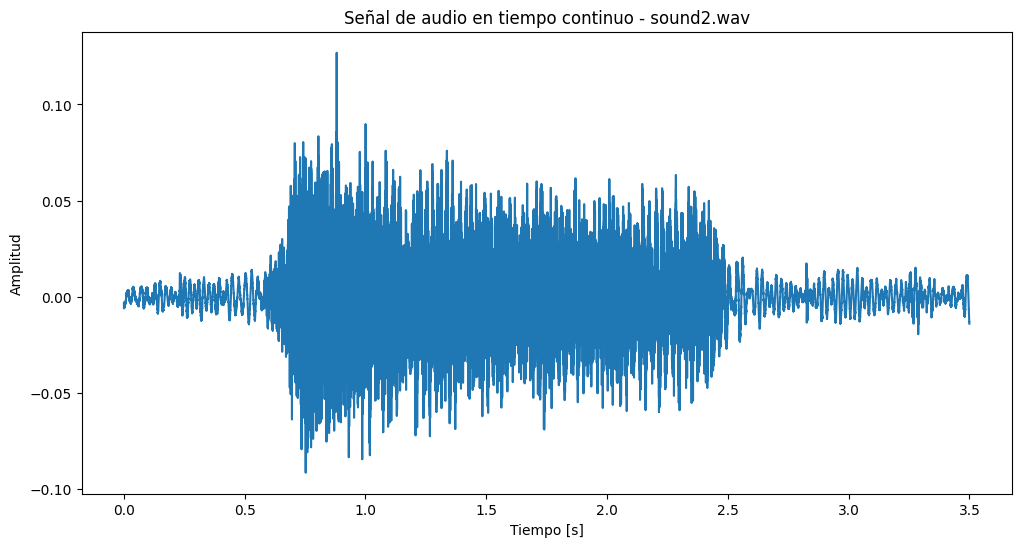

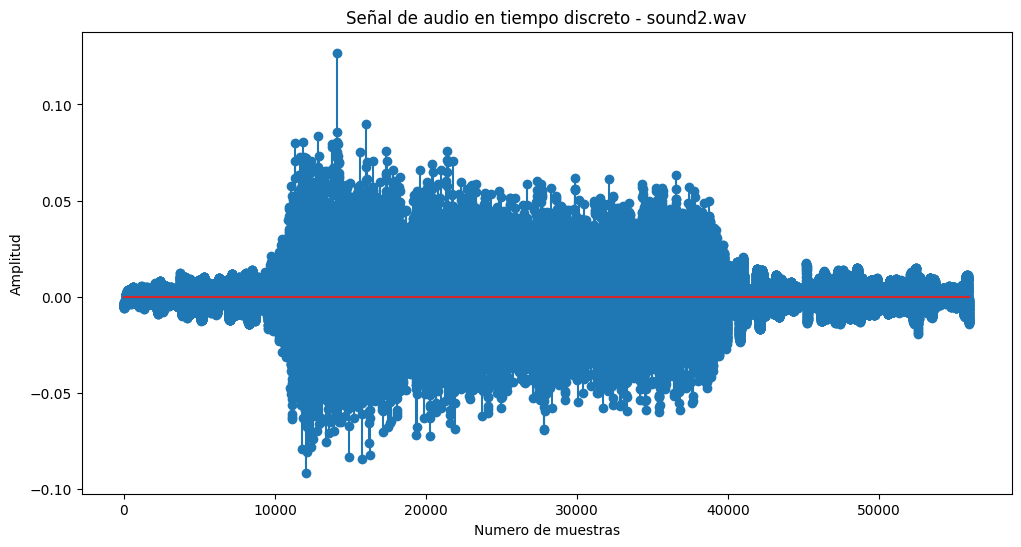

--------------------------------------------------------------------
plot the wave sound3.wav


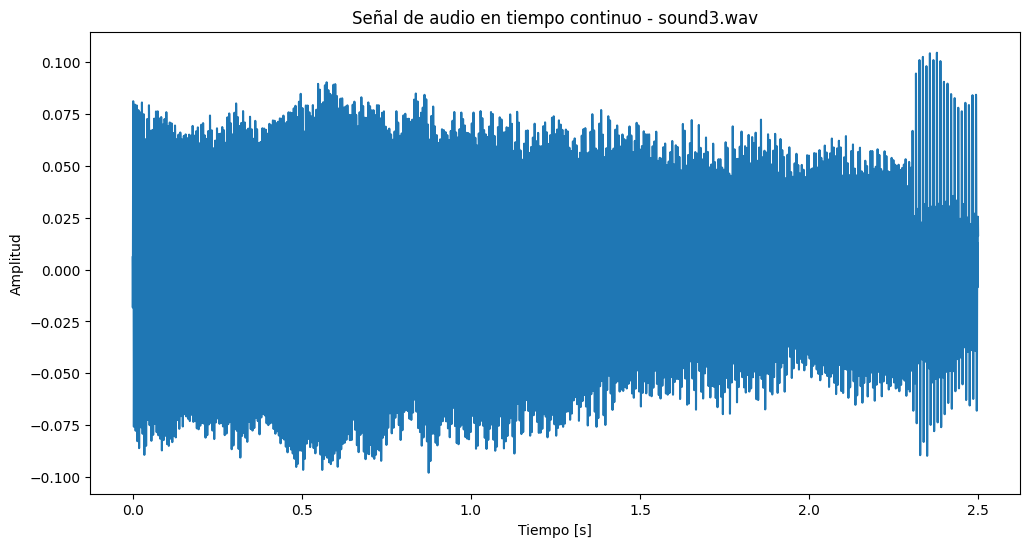

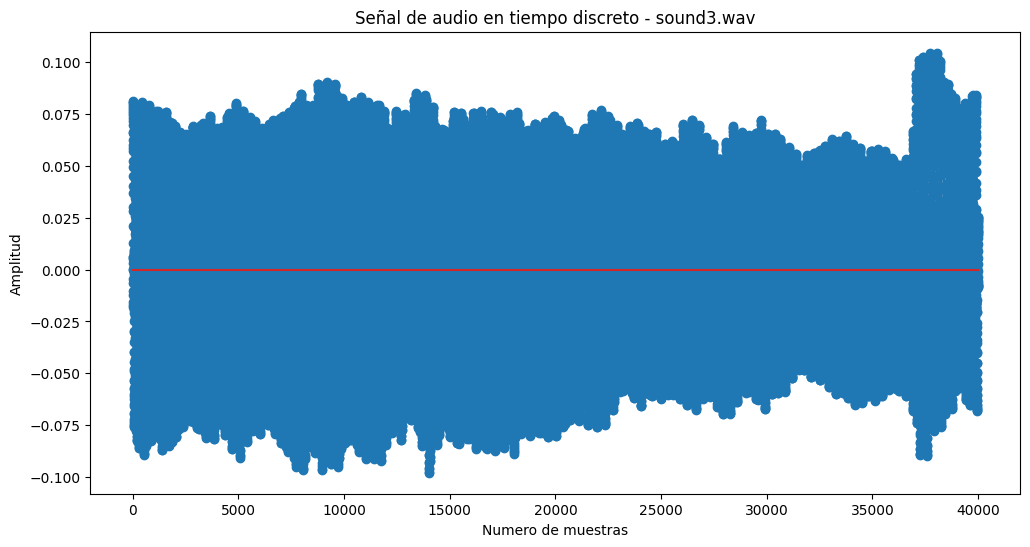

--------------------------------------------------------------------
plot the wave sound4.wav


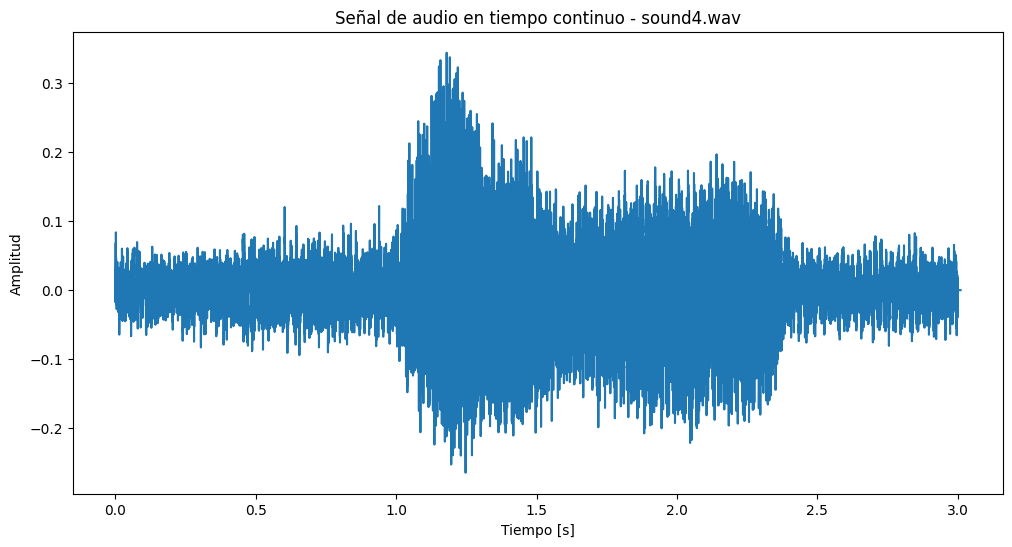

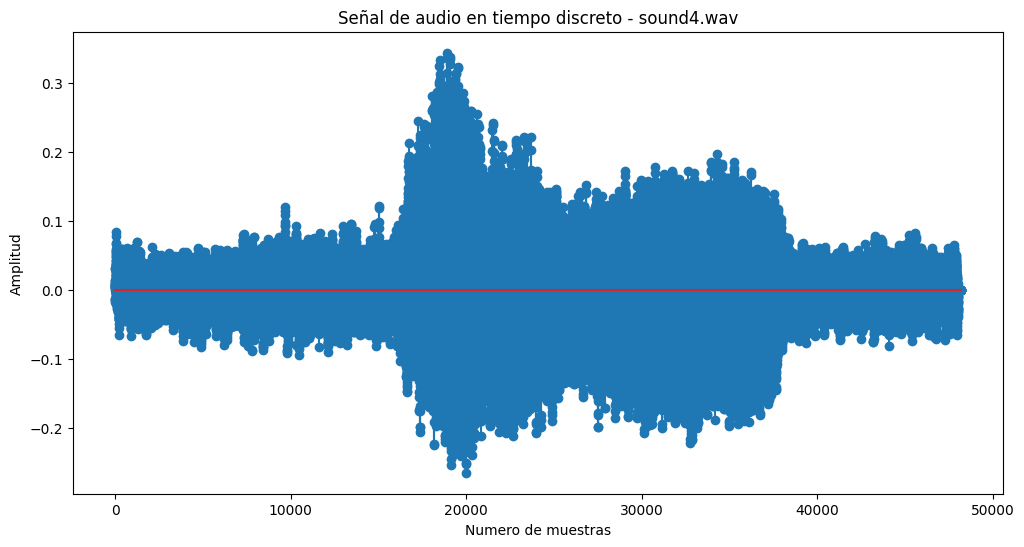

--------------------------------------------------------------------
plot the wave sound5.wav


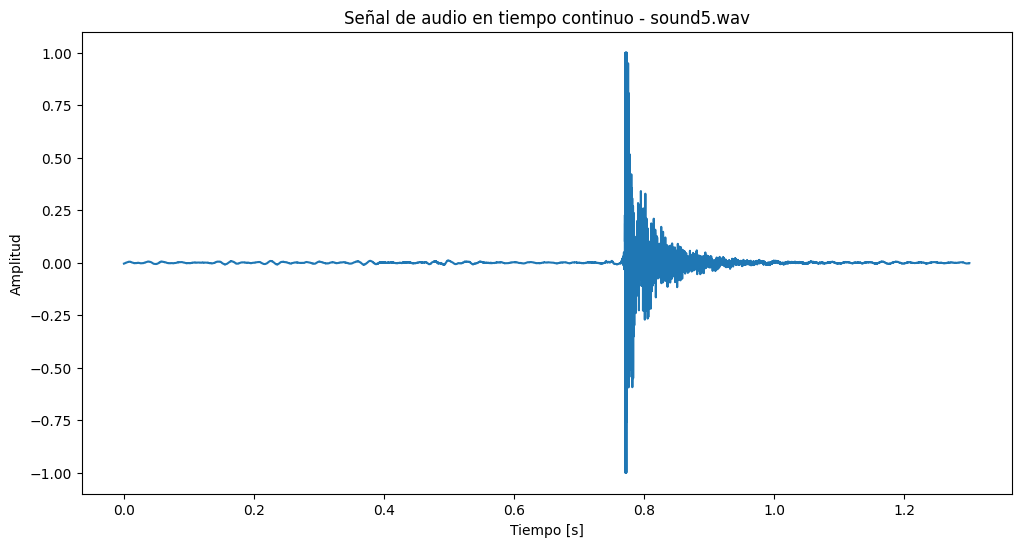

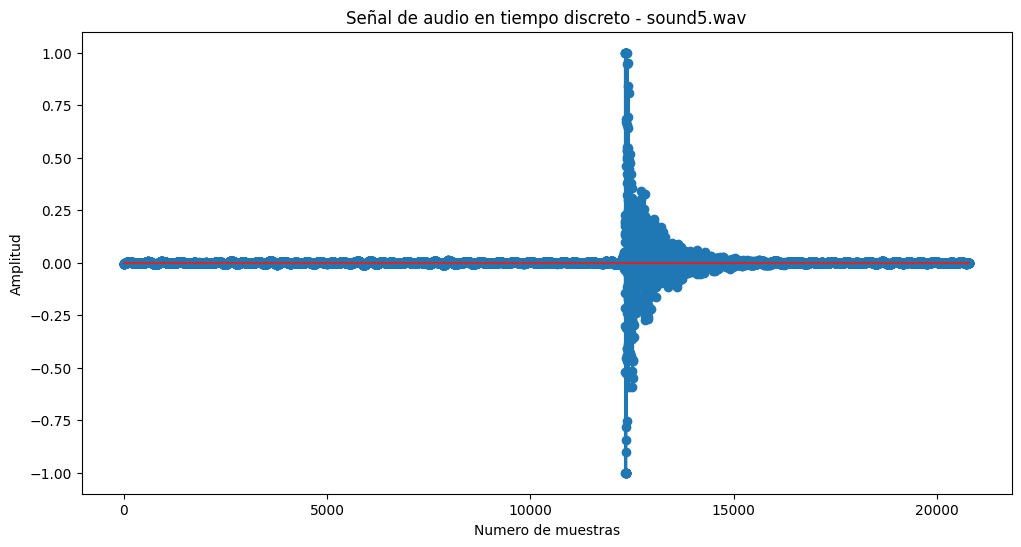

--------------------------------------------------------------------


In [258]:
for archivo_wav in audios.values():
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    numero_muestras = np.arange(0, len(datos)) 
    tiempo_continuo = numero_muestras / frecuencia_muestreo
    
    print(f'plot the wave {archivo_wav}')
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1 

    plt.figure(figsize=(12,6))
    plt.plot(tiempo_continuo, datos)
    plt.title('Señal de audio en tiempo continuo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.stem(numero_muestras, datos)
    plt.title('Señal de audio en tiempo discreto - {}'.format(archivo_wav))
    plt.xlabel('Numero de muestras')
    plt.ylabel('Amplitud')
    plt.show()
    
    print("--------------------------------------------------------------------")


### Ejercicio 1.2

Para los sonidos 1,2,3. Crea un vector que contenga un tramo de
100ms de la señal correspondiente en donde aparezca sonido

Plot the frame sound1.wav
 * periodo es: 0.0057
 * frecuencia es: 175.43859649122805
 * potencia es: 0.0013667823540024636
 * energia es: 45.92388709448278


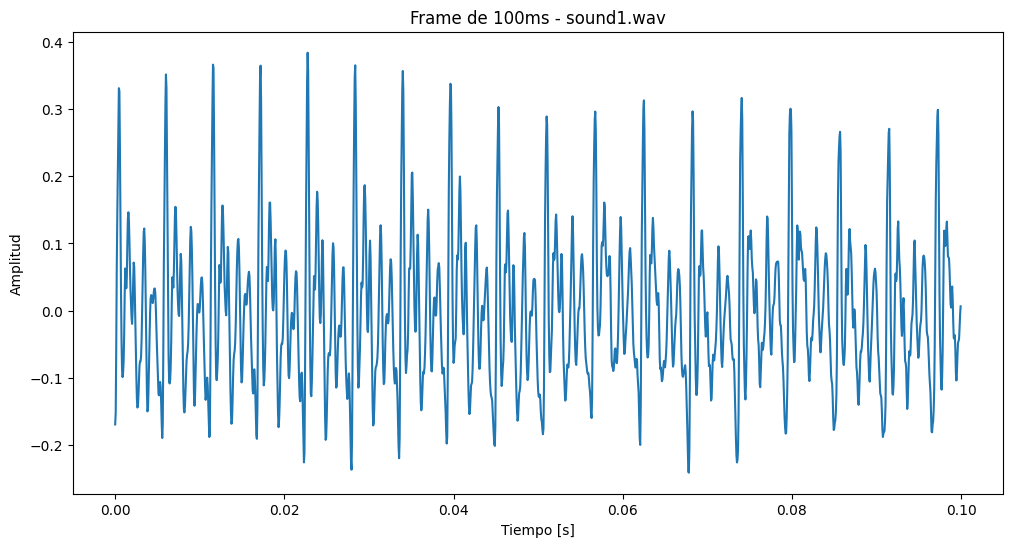

--------------------------------------------------------------------
Plot the frame sound2.wav
 * No es periodica
 * potencia es: 0.00023101726882985248
 * energia es: 12.937198071740568


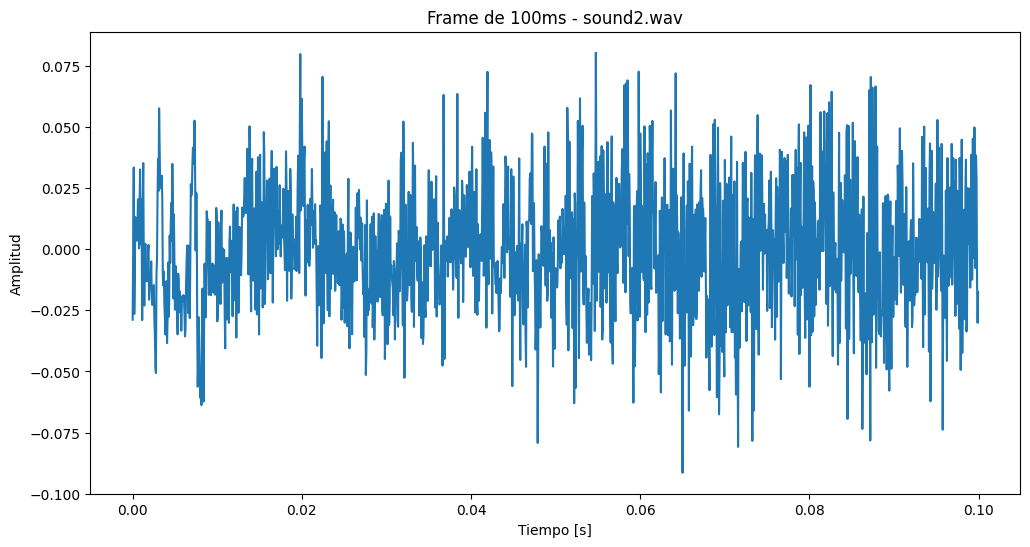

--------------------------------------------------------------------
Plot the frame sound3.wav
 * periodo es: 0.0049
 * frecuencia es: 204.08163265306123
 * potencia es: 0.001762900963553783
 * energia es: 70.51780144311488


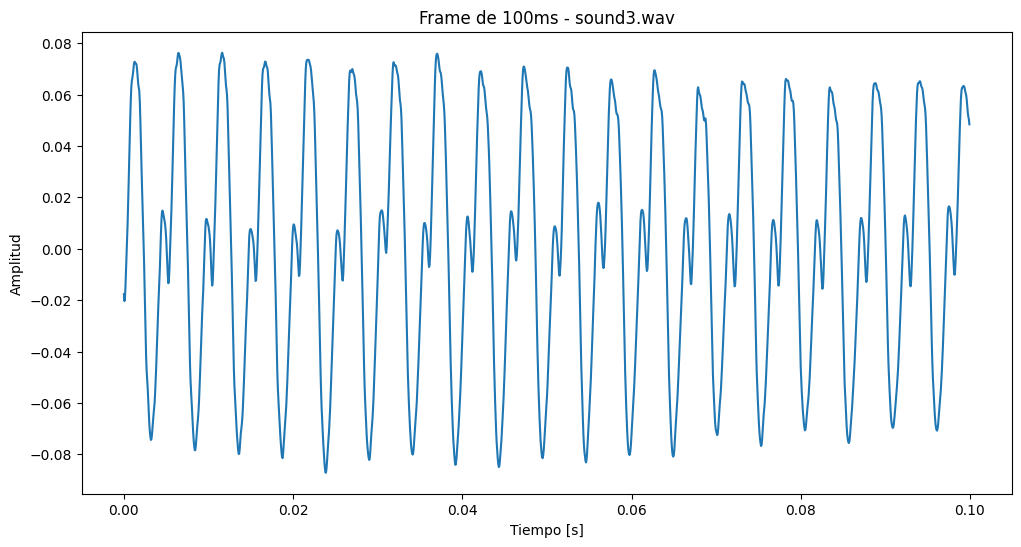

--------------------------------------------------------------------


In [25]:
# List of audio files
tres_audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav2': 'sound2.wav',
    'archivo_wav3': 'sound3.wav'
}

muestras_audios = {
    'sound1.wav': 13800,
    'sound2.wav': 11000,
    'sound3.wav': 1000,
    'sound4.wav': 17500,
    'sound5.wav': 12300
}

periodos = {
    'sound1.wav': 0.0057,
    'sound3.wav': 0.0049
}

for archivo_wav in tres_audios.values():
# Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create a dictionary to store the samples
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + num_samples] # 100ms frame
    
    print(f'Plot the frame {archivo_wav}')
    
    if archivo_wav in periodos:
        periodo = periodos[archivo_wav]
        print(f' * periodo es: {periodo}')
        print(f' * frecuencia es: {1/periodo}')
    else:
        print(f' * No es periodica')
    
    #power
    power = 1/len(datos) * np.sum(np.abs(datos)**2)
    print(f' * potencia es: {power}')
    
    #energy
    energy = np.sum(np.abs(datos**2))
    print(f' * energia es: {energy}')
    
    tiempo = np.arange(0, len(frame)) / frecuencia_muestreo

    plt.figure(figsize=(12, 6))
    plt.plot(tiempo, frame)
    plt.title('Frame de 100ms - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
 
    print("--------------------------------------------------------------------")

### Ejercicio 1.3 

El vector tiene de sound1.wav tiene 21 componentes


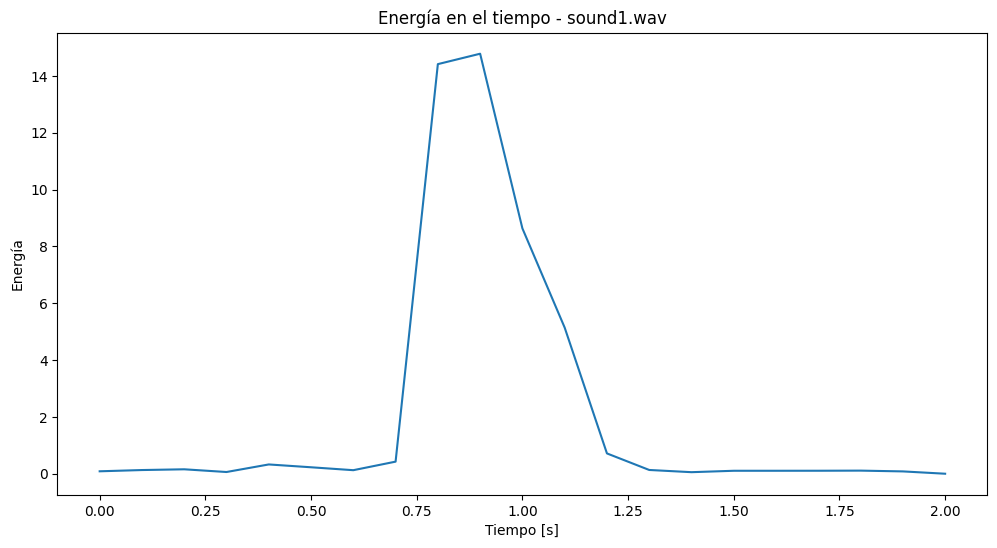

El vector tiene de sound2.wav tiene 35 componentes


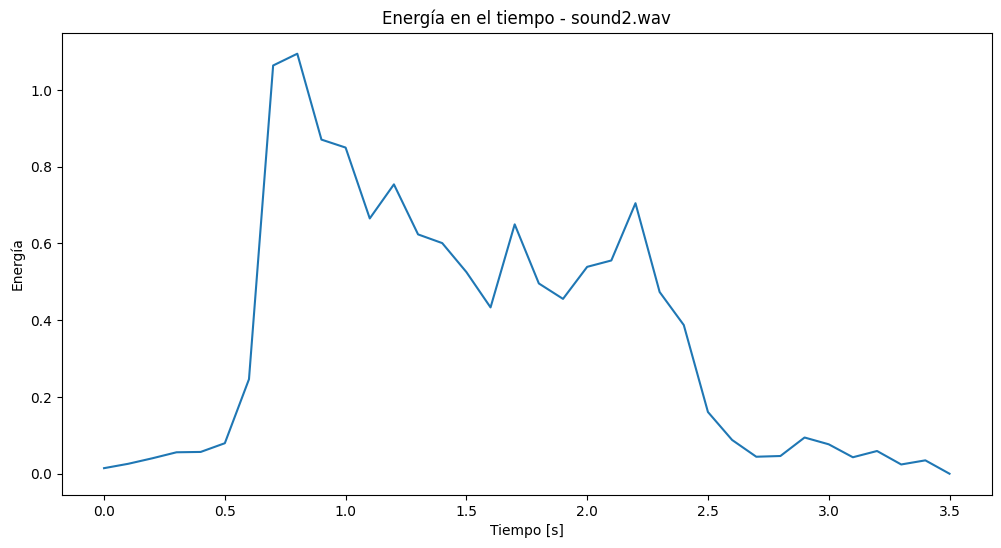

El vector tiene de sound3.wav tiene 25 componentes


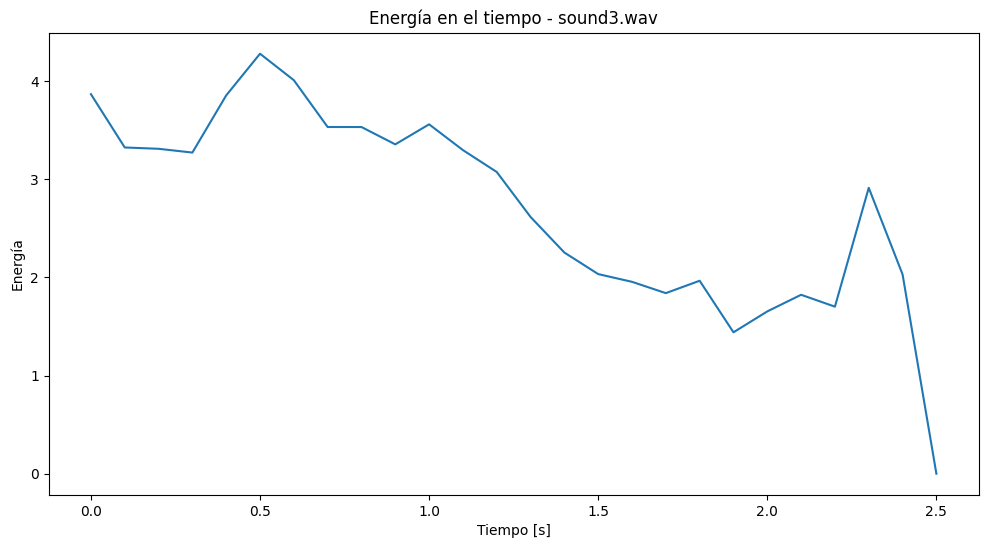

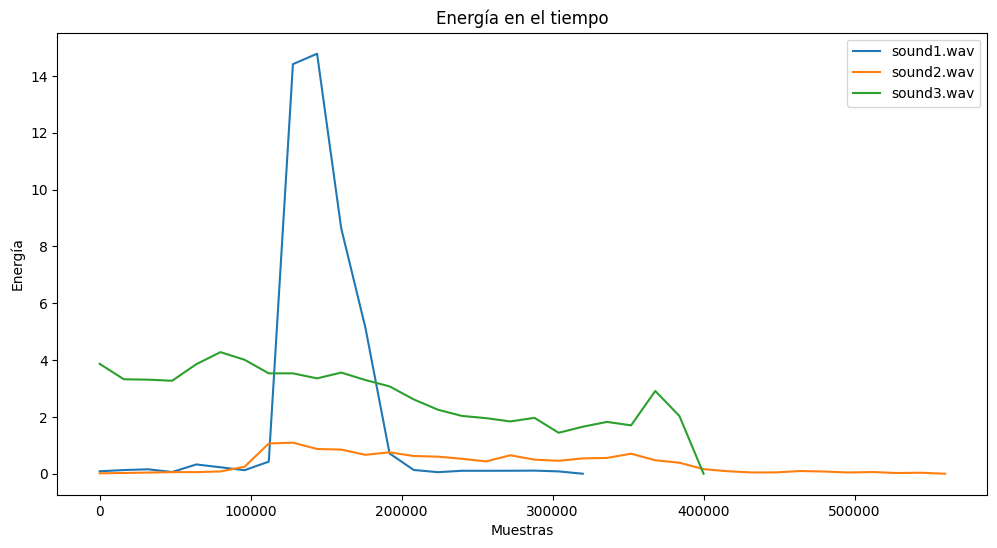

In [260]:
for archivo_wav in tres_audios.values():
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    #datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    L_frame = int(0.1 * frecuencia_muestreo) # 100ms
    
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + L_frame] # 100ms frame
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//L_frame} componentes")

    #haz vector energía que contenga L_frames de datos
    energia = []
 
    for i in range(0, len(datos), L_frame): #this is the same as range(0, len(datos), L_frame) 
        energia.append(np.sum(datos[i:(i+L_frame)]**2))

    #tiempo = np.arange(0, len(energia_frame)) * L_frame / frecuencia_muestreo
    tiempo = np.arange(len(energia)) * 0.1
    
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo, energia)
    plt.title('Energía en el tiempo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()
    
plt.figure(figsize=(12, 6))

for archivo_wav in tres_audios.values():
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    L_frame = int(0.1 * frecuencia_muestreo) # 100ms
    
    frame = datos[muestras_audios[archivo_wav]:muestras_audios[archivo_wav] + L_frame] # 100ms frame

    energia = []
 
    for i in range(0, len(datos), L_frame): #this is the same as range(0, len(datos), L_frame) 
        energia.append(np.sum(datos[i:(i+L_frame)]**2))

    tiempo = np.arange(len(energia)) * frecuencia_muestreo
    
    plt.plot(tiempo, energia, label=archivo_wav)

plt.title('Energía en el tiempo')
plt.xlabel('Muestras')
plt.ylabel('Energía')
plt.legend()
plt.show()

### Ejercicio 1.4

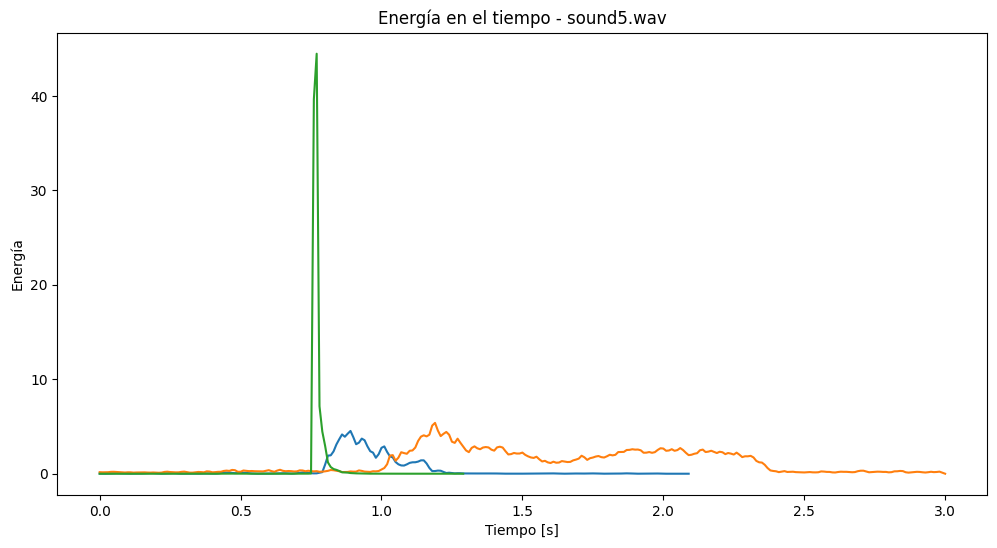

In [261]:
tres_nuevos_audios = {
    'archivo_wav1': 'sound1.wav',
    'archivo_wav4': 'sound4.wav',
    'archivo_wav5': 'sound5.wav'
}

plt.figure(figsize=(12, 6))

for archivo_wav in tres_nuevos_audios.values():
    
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    datos = datos / (2.**15) # normalizar los datos a -1 a 1
    
    L_frame = int(0.02 * frecuencia_muestreo) 
    overlap = int(L_frame * 0.5)
    
    #print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")
    
    energia = []
    
    for i in range(len(datos)//(L_frame-overlap)):
        start = i * (L_frame - overlap)
        end = start + L_frame
        frame = datos[start:end]
        energia.append(np.sum(frame**2))
    
    tiempo = np.arange(len(energia)) * (L_frame - overlap) / frecuencia_muestreo
    
    plt.plot(tiempo, energia)
    
plt.title('Energía en el tiempo - {}'.format(archivo_wav))
plt.xlabel('Tiempo [s]')
plt.ylabel('Energía')
plt.show()